In [1]:
%matplotlib inline

# Data exploration

## Analysis

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../data/clpsych_2018_training_data/clp18_st_train_variables.csv')
keys = [
    'a11_bsag_depression',
    'a23_pdistress',
    'a33_pdistress',
    'a42_pdistress',
]
#df.fillna(value={k: None for k in keys})
for k in 'a11_bsag_total a11_bsag_anxiety a11_bsag_depression a23_pdistress a33_pdistress a42_pdistress'.split():
    df[k] = pd.to_numeric(df[k], errors='coerce')

In [4]:
df.head()

,clp18_id,a11_bsag_total,a11_bsag_anxiety,a11_bsag_depression,a23_pdistress,a33_pdistress,a42_pdistress,cntrl_gender,cntrl_a11_social_class,a11_total1grams
0,clp1893a9b46d,2.0,0.0,0.0,1.0,0.0,3.0,1,IV,337
1,clp184d898665,2.0,1.0,0.0,0.0,0.0,0.0,0,III manual,221
2,clp184645eaf3,2.0,1.0,0.0,0.0,0.0,0.0,1,III manual,178
3,clp1815597ff3,26.0,0.0,0.0,NaN,NaN,NaN,0,IV,55
4,clp1804538a4f,2.0,0.0,1.0,NaN,NaN,NaN,1,III manual,313


### Descriptive statistics

In [5]:
df.describe()

,a11_bsag_total,a11_bsag_anxiety,a11_bsag_depression,a23_pdistress,a33_pdistress,a42_pdistress,cntrl_gender,a11_total1grams
count,9146.000000,9146.000000,9146.000000,7060.000000,6483.000000,6402.000000,9217.000000,9217.000000
mean,8.138968,0.543516,1.009294,1.220467,0.998309,1.489535,0.491266,225.258002
std,8.706165,1.184979,1.519410,1.563165,1.541282,1.763993,0.499951,115.978519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,141.000000
50%,5.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,205.000000
75%,12.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,287.000000
max,61.000000,12.000000,10.000000,9.000000,9.000000,9.000000,1.000000,1532.000000


### Plots showing the relationship between the number of essay words and three age 11 outputs

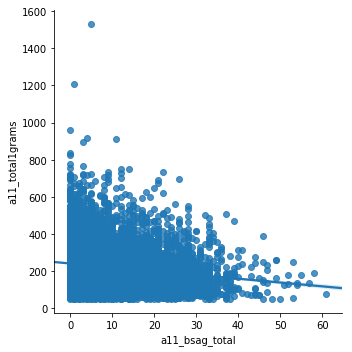

In [6]:
sns.lmplot(data=df, x='a11_bsag_total', y='a11_total1grams')

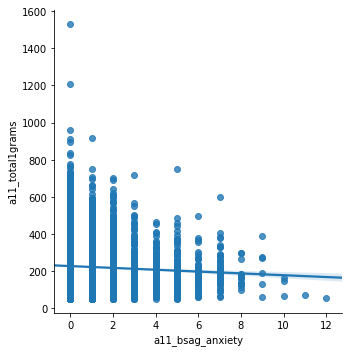

In [7]:
sns.lmplot(data=df, x='a11_bsag_anxiety', y='a11_total1grams')

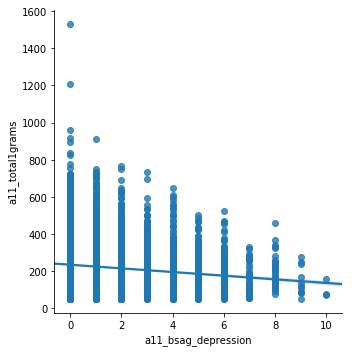

In [8]:
sns.lmplot(data=df, x='a11_bsag_depression', y='a11_total1grams')

### Facet grids showing the relationship between class/gender and the three age 11 outputs

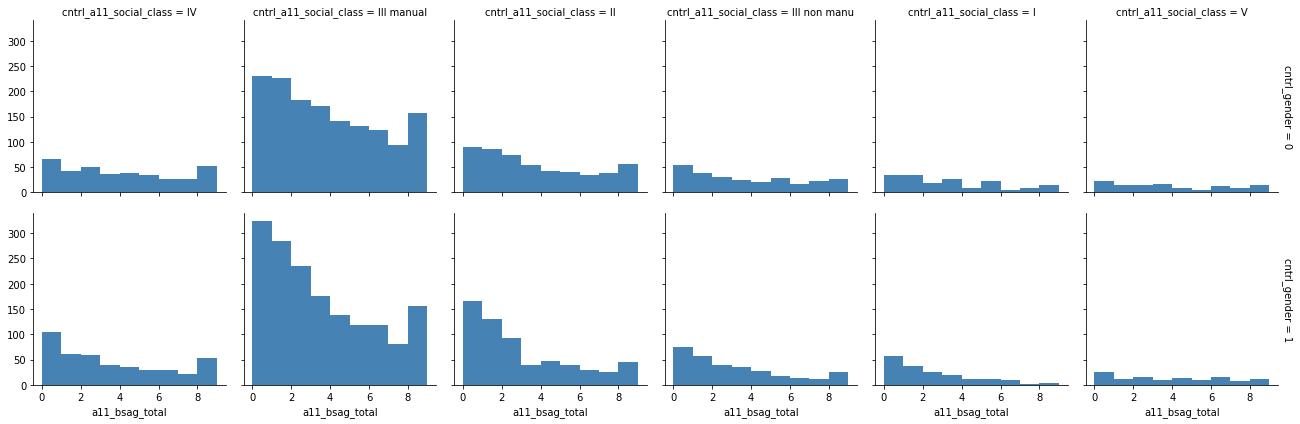

In [9]:
g = sns.FacetGrid(df, row="cntrl_gender", col="cntrl_a11_social_class", margin_titles=True)
bins = np.linspace(0, 9, 10)
g.map(plt.hist, "a11_bsag_total", color="steelblue", bins=bins, lw=0)

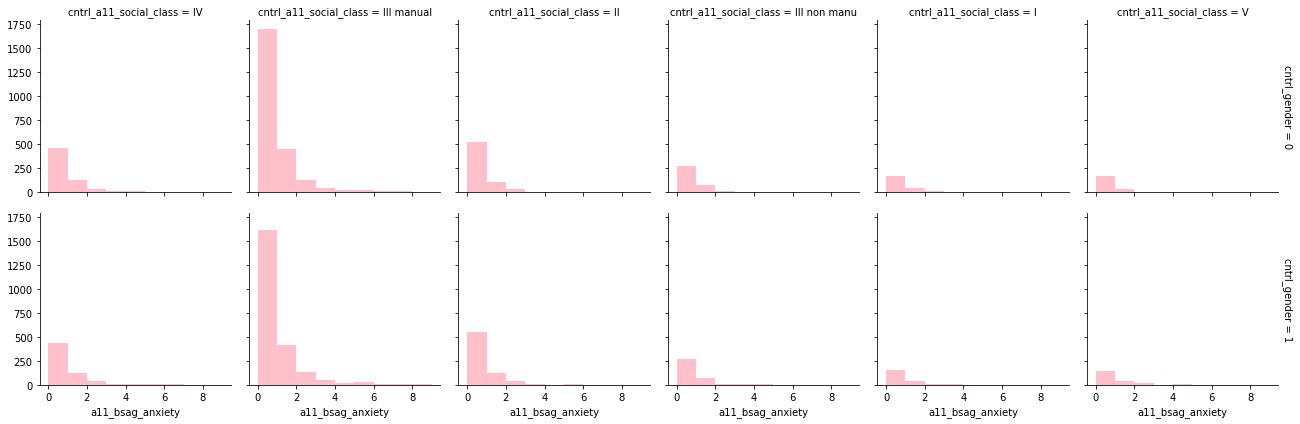

In [10]:
g = sns.FacetGrid(df, row="cntrl_gender", col="cntrl_a11_social_class", margin_titles=True)
bins = np.linspace(0, 9, 10)
g.map(plt.hist, "a11_bsag_anxiety", color="pink", bins=bins, lw=0)

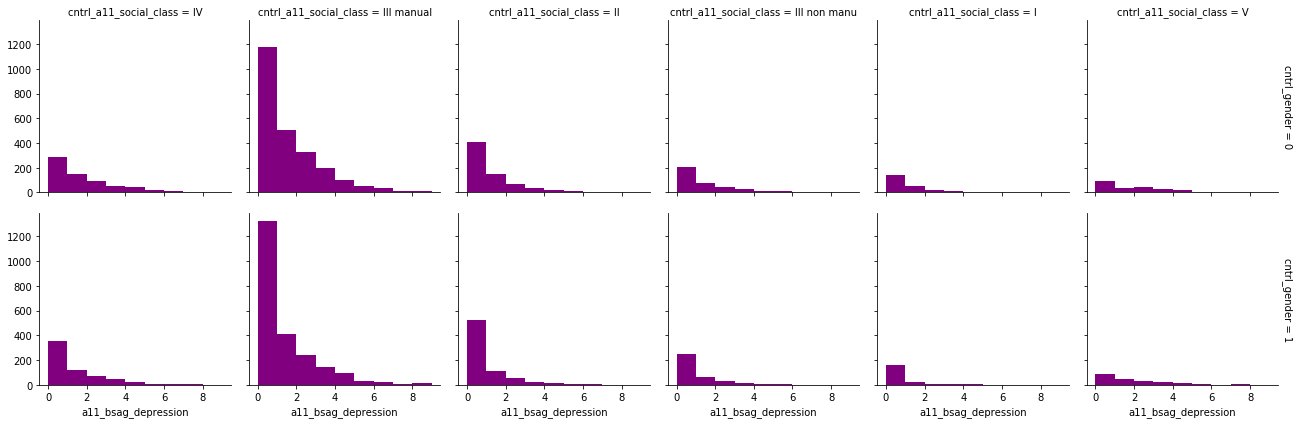

In [11]:
g = sns.FacetGrid(df, row="cntrl_gender", col="cntrl_a11_social_class", margin_titles=True)
bins = np.linspace(0, 9, 10)
g.map(plt.hist, "a11_bsag_depression", color="purple", bins=bins, lw=0)

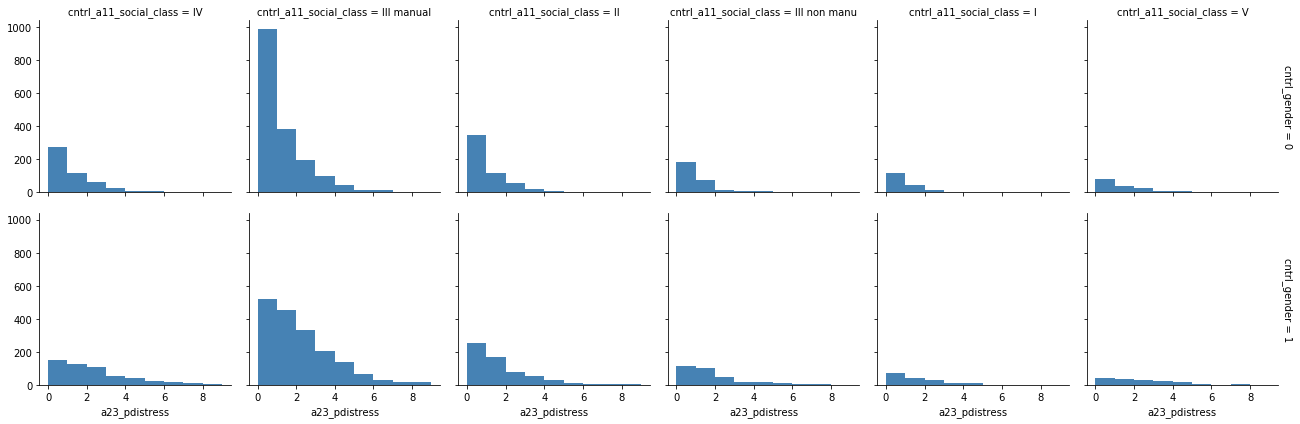

In [12]:
g = sns.FacetGrid(df, row="cntrl_gender", col="cntrl_a11_social_class", margin_titles=True)
bins = np.linspace(0, 9, 10)
g.map(plt.hist, "a23_pdistress", color="steelblue", bins=bins, lw=0)

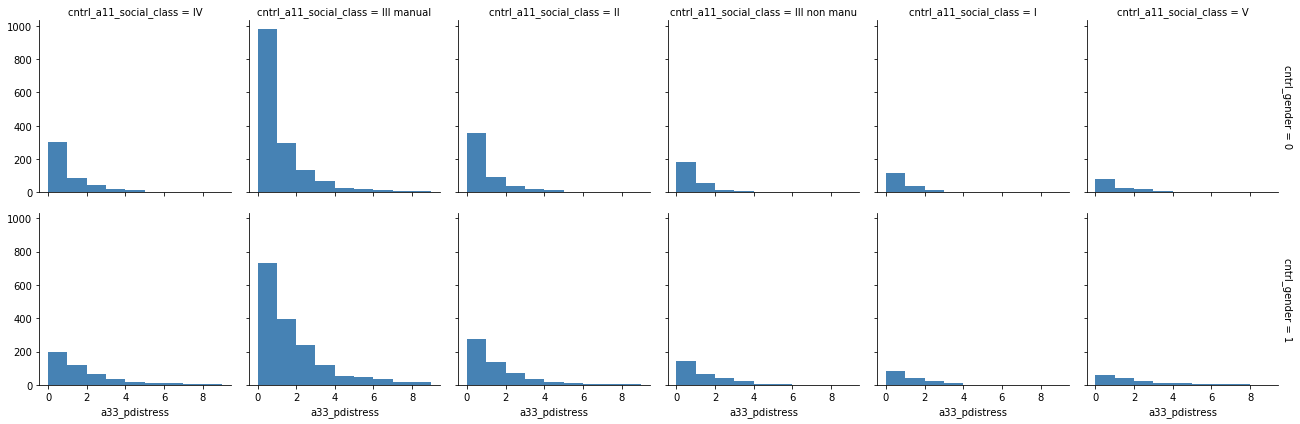

In [13]:
g = sns.FacetGrid(df, row="cntrl_gender", col="cntrl_a11_social_class", margin_titles=True)
bins = np.linspace(0, 9, 10)
g.map(plt.hist, "a33_pdistress", color="steelblue", bins=bins, lw=0)

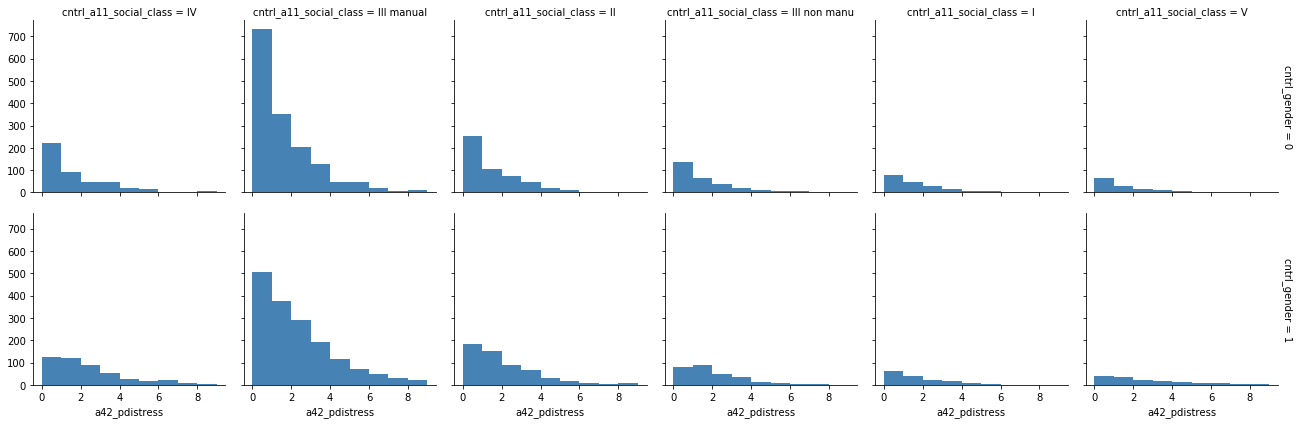

In [14]:
g = sns.FacetGrid(df, row="cntrl_gender", col="cntrl_a11_social_class", margin_titles=True)
bins = np.linspace(0, 9, 10)
g.map(plt.hist, "a42_pdistress", color="steelblue", bins=bins, lw=0)

### Distress sequence analysis

We can look at the distress variables at ages 23, 33 and 42.

In [15]:
from collections import Counter
from statistics import mean
import numpy as np

paths = Counter()
total = 0
means = []
ranges = []
pairs = Counter()
cuts = [
    4,
    4,
    4,
]
keys = [
    'a23_pdistress',
    'a33_pdistress',
    'a42_pdistress',
]

for _, i in df.iterrows():
    path = []
    for key, cut in zip(keys, cuts):
        if np.isnan(i[key]):
            path.append(None)
        else:
            path.append(i[key] >= cut)
    path = tuple(path)
    paths[path] += 1
    pairs.update([tuple(path[1:]), tuple(path[1:])])
    total += 1

path_df = pd.DataFrame([{'path': p, 'count': c, 'prob': c / total}
                        for p, c in paths.most_common()],
                       columns=['path', 'count', 'prob'])

In [16]:
path_df.head(100)

,path,count,prob
0,"(False, False, False)",4027,0.436910
1,"(None, None, None)",1056,0.114571
2,"(False, None, None)",785,0.085169
3,"(False, False, None)",584,0.063361
4,"(None, False, False)",545,0.059130
5,"(False, None, False)",437,0.047412
6,"(False, False, True)",305,0.033091
7,"(True, False, False)",198,0.021482
8,"(None, None, False)",192,0.020831
9,"(None, False, None)",162,0.017576


In [17]:
pair_total = sum(pairs.values())
pd.DataFrame([{'transition': p, 'count': c, 'prob': c / pair_total}
              for p, c in pairs.most_common()], columns=['transition', 'count', 'prob'])

,transition,count,prob
0,"(False, False)",9540,0.517522
1,"(None, None)",3884,0.210698
2,"(False, None)",1570,0.085169
3,"(None, False)",1318,0.071498
4,"(False, True)",918,0.049799
5,"(True, True)",412,0.022350
6,"(True, False)",350,0.018987
7,"(None, True)",266,0.014430
8,"(True, None)",176,0.009548


Here are the top-10 value sequences.

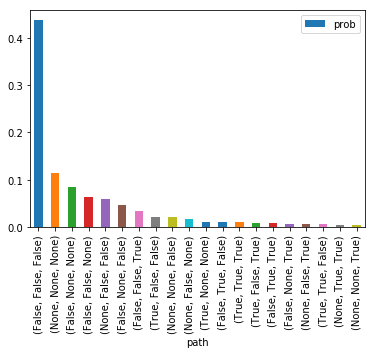

In [18]:
path_df.head(20).plot.bar(x='path', y='prob')

In [19]:
d = Counter([i >= 4 for i in df['a23_pdistress'] if not np.isnan(i)])

In [20]:
for k, v in d.items():
    print(f'{v}\t{v/sum(d.values())}\t{k}')

6401	0.906657223796034	False
659	0.093342776203966	True


In [21]:
scores_at_11 = [i for i in df['a11_bsag_depression'] if not np.isnan(i)]
print(np.percentile(scores_at_11, 90))

3.0


In [22]:
scores_at_11 = [i for i in df['a11_bsag_total'] if not np.isnan(i)]
print(np.percentile(scores_at_11, 90))

21.0


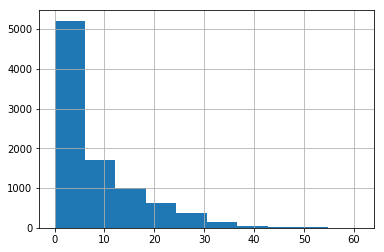

In [23]:
df['a11_bsag_total'].hist()

In [24]:
from sklearn.metrics import accuracy_score
def any_true(path):
    if path[0] or path[1]:
        return True
    else:
        return False
    
def scan(paths, func):
    actual, preds = [], []
    for p, count in paths.items():
        for i in range(count):
            if p[2] is None:
                continue
            actual.append(p[2])
            preds.append(func(p))
    print(accuracy_score(actual, preds))

In [25]:
scan(paths, lambda p: True if (p[0] or p[1]) else False)

0.8623867541393314


In [26]:
scan(paths, lambda p: True if p[1] else False)

0.88019368947204


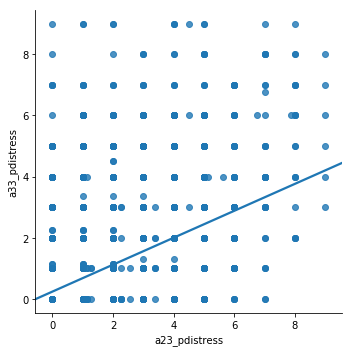

In [27]:
sns.lmplot(x='a23_pdistress', y='a33_pdistress', data=df, robust=True, ci=None)#, hue='cntrl_a11_social_class')

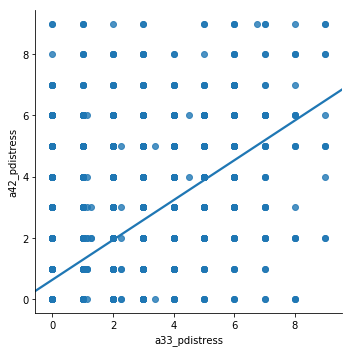

In [28]:
sns.lmplot(x='a33_pdistress', y='a42_pdistress', data=df, robust=True, ci=None)#, hue='cntrl_a11_social_class')

## Dropout numbers

In [29]:
keys = [
    'a23_pdistress',
    'a33_pdistress',
    'a42_pdistress',
]

counts = Counter()

for _, i in df.iterrows():
    path = []
    for key in keys:
        if not np.isnan(i[key]):
            counts[key] += 1
print(counts.most_common())

[('a23_pdistress', 7060), ('a33_pdistress', 6483), ('a42_pdistress', 6402)]


In [34]:
from data import load_jsonl
train = load_jsonl('train.raw.jsonl')
lengths = [i['stat_n_tokens'] for i in train]
import statistics
print(min(lengths), statistics.median(lengths), max(lengths))

48 207 1640


In [35]:
from data import load_jsonl
train = load_jsonl('train.jsonl')
lengths = [i['stat_n_tokens'] for i in train]
import statistics
print(min(lengths), statistics.median(lengths), max(lengths))

48 207 1627


In [37]:
ones, twos = [], []
for _, i in df.iterrows():
    path = []
    if np.isnan(i['a23_pdistress']) or np.isnan(i['a33_pdistress']):
        continue
    ones.append(i['a23_pdistress'] - i['a33_pdistress'])
    if np.isnan(i['a33_pdistress']) or np.isnan(i['a42_pdistress']):
        continue
    twos.append(i['a33_pdistress'] - i['a42_pdistress'])
print(statistics.mean(ones), statistics.mean(twos))

0.23449768436052726 -0.486125961927906
